# Uso de la regresión lineal 

## Lectura en los datos

Trabajaremos con un conjunto de datos de llamado `bikeshare.csv` que fue utilizado en un concurso de Kaggle.

In [1]:
# Leemos los datos y establecemos  la fecha y hora como  índice

import pandas as pd
bicis = pd.read_csv("bikeshare.csv", index_col='datetime', parse_dates=True)

In [2]:
bicis.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


####  Preguntas: 

 * ¿Qué representa cada observación?
 * ¿Cuál es la variable de respuesta ?
 * ¿Cuántas características hay?

In [3]:
# count es un método, por lo que es mejor nombrar esa columna

bicis.rename(columns={'count':'total'}, inplace=True)

## Visualización de datos 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

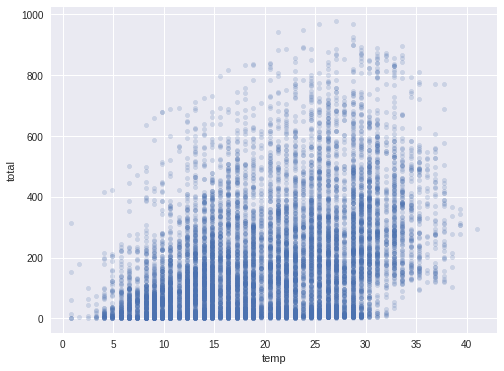

In [5]:
# Diagrama de dispersion de pandas

bicis.plot(kind='scatter', x='temp', y='total', alpha=0.2)

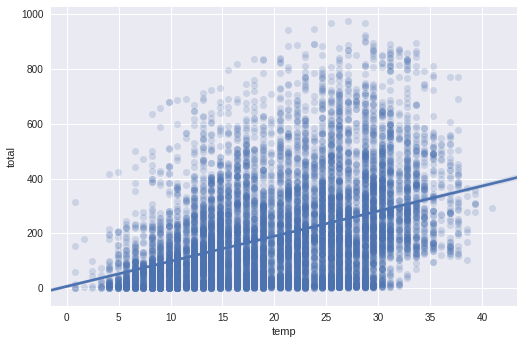

In [6]:
# Diagrama de dispersión con Seaborn y una línea de regresión

sns.lmplot(x='temp', y='total', data=bicis, aspect=1.5, scatter_kws={'alpha':0.2})

## Forma de la regresión lineal

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

   * $y$ es la respuesta
   * $\beta_0$ es el intercepto
   * $\beta_1$ es el coeficiente por $x_1$ (la primera característica )
   * $\beta_n$ is the coefficient for $x_n$ (la segunda característica)

Los valores $\beta$ son llamados los  `coeficientes del modelo`:

  * Estos valores son estimados (o "aprendidos") durante el proceso de adaptación del modelo utilizando el criterio ` mínimos cuadrados`.

  * Específicamente, encontramos la línea (matemáticamente) que minimiza la  `suma de errores cuadráticos`).

  * Y una vez que hemos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.
  
  <img src="Coeficientes.png" width="500" />
  
En el diagrama anterior:

  * Los puntos negros son los `valores observados` de x e y.
  * La línea azul es nuestra  `línea de mínimos cuadrados `.
  * Las líneas rojas son los  `residuos`, que son las distancias verticales entre los valores observados y la línea de mínimos cuadrados.

## Construyendo un modelo de regresión lineal

In [7]:
# Creamos X e y

cols_caracteristica= ['temp']
X = bicis[cols_caracteristica]
y = bicis.total

In [8]:
# Importamos, instanciamos, fijamos

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Imprimimos los coeficientes

print (linreg.intercept_)
print (linreg.coef_)

6.04621295962
[ 9.17054048]


* Interpretación del intercepto $\beta_0$:

   * Es el valor de `y` cuando `x` = 0. Por lo tanto, es el número estimado de alquileres cuando la temperatura es de `0` grados Celsius.
   *  `Nota:` No siempre tiene sentido interpretar la intercepción. (¿Por qué?)

* Interpretación del coeficiente `temp` $\beta_1$:

   * Es el cambio en `y` dividido por cambio en  `x`, o la `pendiente`.
   * Por lo tanto, un aumento de temperatura de 1 grado Celsius es asociado con  un aumento de alquiler de `9.17` bicicletas.
   * No se trata de una declaración de causalidad.
   *  $\beta_1 $ sería   `negativo`  si un aumento en la temperatura se asocia con una `disminución` en alquileres.

## Utilizando el modelo para la predicción

¿Cuántos alquileres de bicicletas podríamos predecir si la temperatura era de 25 grados Celsius?

In [10]:
# Calculamos manualmente la predicción

linreg.intercept_ + linreg.coef_*25

array([ 235.309725])

In [11]:
# Utilizamos el método predictivo

linreg.predict(25)

array([ 235.309725])

## ¿Es importante la escala de las características?

Digamos que la temperatura se midió en Fahrenheit, en lugar de Celsius. ¿Cómo afectaría esto al modelo?

In [12]:
# creamos una nueva columna para la temperatura en Fahrenheit

bicis['temp_F'] = bicis.temp * 1.8 + 32
bicis.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


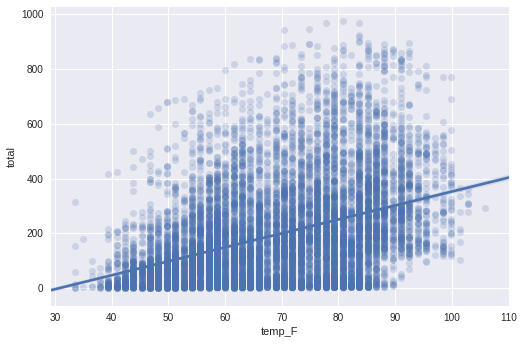

In [13]:
# Diagrama de dispersión con Seaborn y una línea de regresión

sns.lmplot(x='temp_F', y='total', data=bicis, aspect=1.5, scatter_kws={'alpha':0.2})

In [14]:
# Creamos X e y
cols_caracteristica = ['temp_F']
X = bicis[cols_caracteristica]
y = bicis.total

# Instanciamos y fijamos
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos los coeficientes
print (linreg.intercept_)
print (linreg.coef_)

-156.985617821
[ 5.09474471]


In [15]:
# Convertimos los 25 grados Celsius y  Fahrenheit

25 * 1.8 + 32

77.0

In [16]:
# Predecimos los alquileres para 77 grados Fahrenheit

linreg.predict(77)

array([ 235.309725])

La escala de las características es `irrelevante` para los modelos de regresión lineal. Al cambiar la escala, simplemente cambiamos nuestra  `interpretación`  de los coeficientes.

In [17]:
# Quitamos la columna temp_F

bicis.drop('temp_F', axis=1, inplace=True)

## Visualización de datos 

In [18]:
# Exploramos mas caracteristica

cols_caracteristica = ['temp', 'season', 'weather', 'humidity']


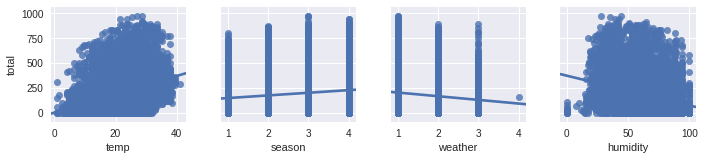

In [19]:
# Multiples graficos de dispersion con Seaborn

sns.pairplot(bicis, x_vars=cols_caracteristica, y_vars='total', kind='reg')

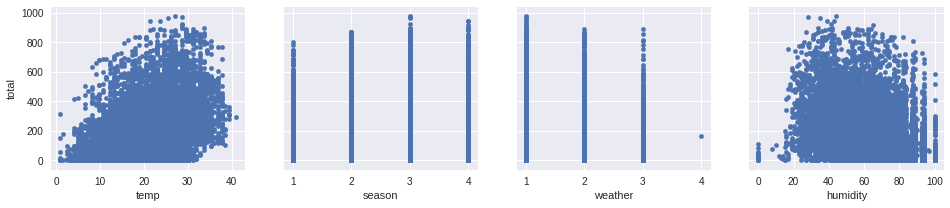

In [20]:
# Multiples graficos de dispersion con Pandas

fig, axs = plt.subplots(1, len(cols_caracteristica), sharey=True)
for indices, caracteristica in enumerate(cols_caracteristica):
    bicis.plot(kind='scatter', x=caracteristica, y='total', ax=axs[indices], figsize=(16, 3))

¿Estás viendo algo que no esperabas?

In [21]:
# Tabulación cruzada de season y month

pd.crosstab(bicis.season, bicis.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


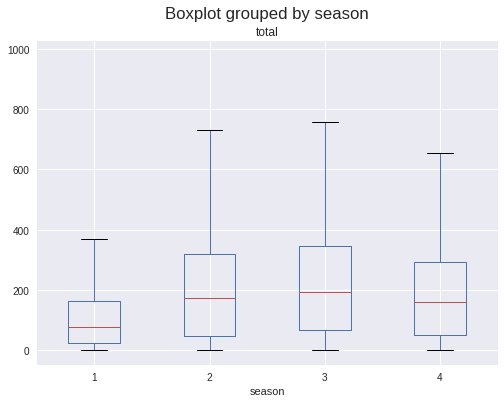

In [22]:
# Grafico de  caja de rentals, agrupados por season

bicis.boxplot(column='total', by='season')

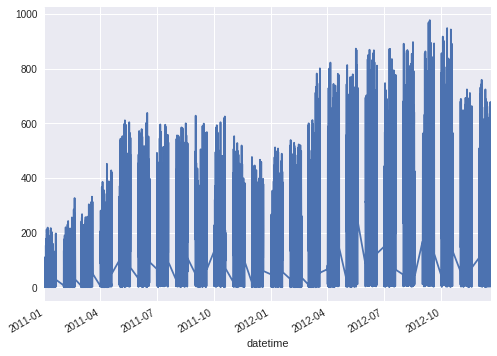

In [23]:
# Grafico de lineas para rental

bicis.total.plot()

¿Qué nos dice esto?

Hay más alquileres en el invierno que en la primavera, pero sólo porque el sistema está experimentando un crecimiento general y los meses de invierno suceden después de los meses de primavera.

In [24]:
# Matriz de correlación (oscilando entre 1 y -1)

bicis.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


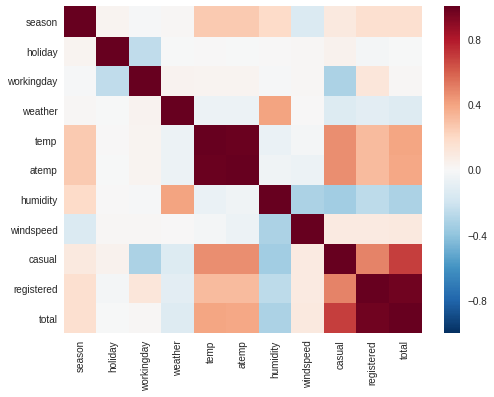

In [25]:
# Visualizando la matriz de correlacion usando Seaborn via heatmap

sns.heatmap(bicis.corr())

## Agregando más características al modelo

In [26]:
# Creamos una lista de caracteristica

cols_caracteristica = ['temp', 'season', 'weather', 'humidity']

In [27]:
# Creamos X e y
X = bicis[cols_caracteristica]
y = bicis.total

# Instanciamos y fijamos
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos los coeficientes
print (linreg.intercept_)
print (linreg.coef_)

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [28]:
# Asociamos los nombres de las caracteristicas con los coeficientes

list(zip(cols_caracteristica, linreg.coef_))

[('temp', 7.8648249924774394),
 ('season', 22.538757532466761),
 ('weather', 6.6703020359237186),
 ('humidity', -3.1188733823965009)]

Interpretación de los coeficientes:

* Manteniendo todas las demás características fijas, un incremento de 1 unidad  en `temperature` se asocia con un aumento de alquiler de 7.86 bicicletas.
 
* Manteniendo todas las demás características fijas, un aumento de 1 unidad en  `season` se asocia con un  aumento de alquiler de 22.5 bicicletas.

* Manteniendo todas las demás características fijas, un incremento de 1 unidad en `weather` se asocia con un  aumento de alquiler de 6.67 bicicletas.

* Manteniendo todas las demás características fijas, un aumento de 1 unidad en `humidity` se asocia con una  disminución de alquiler de 3.12 bicicletas .

¿Algo parece incorrecto?

## Selección de características

¿Cómo elegimos qué características incluir en el modelo? Vamos a utilizar las división datos de entrenamiento y prueba y eventualmente la  validación cruzada.

¿Por qué no utilizar `p-valores` o $R^2$  para la selección de características?


* Los modelos lineales se basan en  una gran cantidad de suposiciones  (tales como las características que son independientes) y si esas suposiciones no se cumplen, los  `p-valores` y los coeficientes de determinación $R^2$ son menos confiables. La división de datos de entrenamiento y prueba,  depende de menos suposiciones.

* Las características que no están relacionadas con la respuesta pueden tener  valores `p` significativos.

* La adición de características al modelo que no están relacionadas con la respuesta siempre  aumentaran el valor $R^2$  y ajustando estos coeficientes  no es suficiente para este caso.

- La división de datos de entrenamiento y de pruebas  la validación cruzada intentan  estimar directamente  qué tan bien el modelo generalizará a los datos fuera de la muestra .

Más generalmente:

 * Existen diferentes metodologías que pueden ser utilizadas para resolver cualquier problema dado de la ciencia de los datos, y este curso sigue una metodología de machine learning .
 * Este curso trata de  enfoques de propósito general que pueden ser aplicados a cualquier modelo, en lugar de enfoques específicos a un  modelo.

## Métricas de evaluación para problemas de regresión

Las métricas de evaluación para problemas de clasificación, como  la `precisión` , no son útiles para problemas de regresión. Necesitamos métricas de evaluación diseñadas para comparar valores continuos.

Aquí hay tres métricas de evaluación comunes para los problemas de regresión:

* Error absoluto medio (MAE) es la media de los valores absolutos de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

* Error cuadrado medio  (MSE) es la media de los errores cuadráticos :

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

* Raiz cuadrada del error cuadrado medio (RMSE) es la raíz cuadrada de la media de los errores cuadráticos:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [29]:
# Ejemplo de valores de respuesta verdaderos y predichos

verdadero = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [30]:
# Calculamos esas métricas a mano !

from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(verdadero, pred))
print ('MSE:', metrics.mean_squared_error(verdadero, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(verdadero, pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


Comparando estas métricas:

 * MAE  es el más fácil de entender, porque es el error promedio.
 * MSE  es más popular que MAE, porque MSE `sanciona` errores mayores, que tienden a ser útil en el mundo real.
 * RMSE  es aún más popular que MSE, porque RMSE es interpretable en las unidades `y`.

Todas estas son `funciones de pérdida`, porque queremos minimizarlas.

## Comparación de modelos con la división  de entrenamiento/ prueba y RMSE

In [31]:
from sklearn.model_selection  import train_test_split

# Definimos una funcion que acepta una lista de caracteristicas y devuelve pruebas RMSE

def entrenamiento_prueba_rmse(cols_caracteristica):
    X = bicis[cols_caracteristica]
    y = bicis.total
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_entrenamiento, y_entrenamiento)
    y_pred = linreg.predict(X_prueba)
    return np.sqrt(metrics.mean_squared_error(y_prueba, y_pred))

In [32]:
# Comparamos diferentes conjuntos de características

print (entrenamiento_prueba_rmse(['temp', 'season', 'weather', 'humidity']))
print (entrenamiento_prueba_rmse(['temp', 'season', 'weather']))
print (entrenamiento_prueba_rmse(['temp', 'season', 'humidity']))

155.649459131
164.165399763
155.598189367


In [33]:
# No se permite usar estas funciones como características!

print (entrenamiento_prueba_rmse(['casual', 'registered']))

6.46507997608e-14


## Comparando RMSE de prueba con un RMSE nulo

El `RMSE` nulo es el RMSE que podría lograrse  prediciendo el valor medio de respuesta. Es un punto de referencia en el que puedes  medir tu modelo de regresión.

In [34]:
# Dividimos  X e y en conjunto de entrenamiento y pruebas 
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=123)

# Creamos una matriz de Numpy  de la misma forma que   y_prueba
y_nulo = np.zeros_like(y_prueba, dtype=float)

# Llenamos la matriz con los valores medios de y_prueba
y_nulo.fill(y_prueba.mean())
y_prueba

datetime
2012-03-07 21:00:00    188
2012-04-12 03:00:00      5
2011-02-06 10:00:00     89
2011-12-05 23:00:00     62
2011-08-08 14:00:00    150
2011-04-02 21:00:00     77
2011-08-13 19:00:00    237
2011-04-09 20:00:00     93
2011-02-01 19:00:00    108
2012-05-17 03:00:00      3
2011-01-05 06:00:00     33
2011-06-02 01:00:00     15
2012-06-10 12:00:00    502
2011-02-10 19:00:00    112
2012-01-15 21:00:00     72
2012-10-05 01:00:00     46
2012-05-16 19:00:00    590
2011-07-10 16:00:00    372
2011-07-01 23:00:00    140
2011-02-10 16:00:00     80
2011-06-13 02:00:00     10
2011-07-03 01:00:00     78
2012-07-15 22:00:00    130
2011-10-05 02:00:00      3
2011-10-04 20:00:00    261
2011-07-03 00:00:00    144
2011-07-13 02:00:00      5
2012-10-01 08:00:00    784
2012-12-15 06:00:00     11
2011-06-19 04:00:00     17
                      ... 
2011-11-06 14:00:00    320
2011-01-04 20:00:00     54
2012-08-09 17:00:00    810
2012-11-02 20:00:00    221
2011-07-06 13:00:00    140
2011-06-07 21:00:00

In [35]:
# Calculamos el  RMSE nulo

np.sqrt(metrics.mean_squared_error(y_prueba, y_nulo))

179.57906896465727

## Manejo de características categóricas

scikit-learn espera que todas las características sean numéricas. Entonces, ¿cómo incluimos una característica categórica en nuestro modelo?

* Categorías ordenadas:  Las transformarmos en valores numéricos sensibles (ejemplo: pequeño = 1, medio = 2, grande = 3).

* Categorías no ordenadas: Utilizamos [codificación ficticia](http://www.statisticssolutions.com/dummy-coding-the-how-and-why/) (0/1).

¿Cuáles son las características categóricas de nuestro conjunto de datos?

* Categorías ordenadas: `weather` (ya codificado con valores numéricos sensibles)
* Categorías no ordenadas: `season` (necesita codificación ficticia), `holiday` (tiene  codificación ficticia), workingday (tiene codificación ficticia)

Para `season`, no podemos simplemente dejar la codificación como `1 = primavera`, `2 = verano`, `3 = otoño` y `4 = invierno`, porque eso implicaría una relación ordenada . En su lugar, creamos `variables ficticias múltiples`: 

In [36]:
# Creamos variables ficticias
season_ficticias = pd.get_dummies(bicis.season, prefix='season')

# Imprimos 5 filas al azar
season_ficticias.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


Sin embargo, en realidad sólo necesitamos  tres variables ficticias (no cuatro)  y por lo tanto vamos a dejar  la primera variable ficticia.

¿Por qué? Debido a que tres variables ficticias capturan toda la información sobre la característica de `season`, e implicitamente define la `primavera`(`season 1`) como el nivel de referencia: 

In [37]:
# Sacamos la primera columna 
season_ficticias.drop(season_ficticias.columns[0], axis=1, inplace=True)

# Imprimimos 5 filas al azar
season_ficticias.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


En general, si se tiene una característica categórica con `k` valores posibles, se pueden crear `k-1` variables ficticias.

In [38]:
# concatenamos el original DataFrame y el  DataFrame ficticio 
bicis = pd.concat([bicis, season_ficticias], axis=1)

# Imprimimos 5 filas al azar
bicis.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [39]:
# Incluimos variables ficticias para season  en el modelo

cols_caracteristica = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bicis[cols_caracteristica]
y = bicis.total
linreg = LinearRegression()
linreg.fit(X, y)
list(zip(cols_caracteristica, linreg.coef_))

[('temp', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.736860713170678),
 ('season_4', 64.415961468242145),
 ('humidity', -2.819481636259646)]

¿Cómo interpretamos los coeficientes de `season`?. Estos coeficientes se miden con respecto a la línea de base (`primavera`) **:

 * Manteniendo todas las demás características fijas, verano  se asocia con un  decremento de alquiler de 3.39 bicicletas   en comparación con la primavera.

* Manteniendo todas las demás características fijas,  otoño se asocia con una  disminución del alquiler de 41.7 bicicletas  en comparación con la primavera.

* Manteniendo todas las demás características fijas,  invierno  se asocia con un * aumento de alquiler del 64.4 bicicletas  en comparación con la primavera.

¿Importaría si cambiamos qué estación se definió como línea de base?

* No, simplemente cambiaría nuestra  interpretación  de los coeficientes.

** Importante: **  La codificación ficticia es relevante para todos los modelos de machine learning, no sólo para los modelos de regresión lineal.

In [40]:
# Comparamos la variable season con las variables ficticias
print (entrenamiento_prueba_rmse(['temp', 'season', 'humidity']))
print (entrenamiento_prueba_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

155.598189367
154.333945936


## Ingeniería de factores 

Se trata del proceso previo a la creación del modelo de predicción en el que se hace un análisis, limpieza y estructuración de los campos de los datos.  El objetivo es eliminar los campos que no sirven para hacer la predicción y organizarlos adecuadamente para que el modelo no reciba información que no le es útil y que podría provocar predicciones de poca calidad o confianza.

Vea si puedes crear las siguientes características:

 * `hour` como una sola función numérica (de 0 a 23)
 * `hour:` como una característica categórica (usa 23 variables ficticias)
 * `daytime:`  como una sola característica categórica (día = 1 de 7am a 8pm, y día = 0 de lo contrario).

A continuación, prueba a utilizar cada una de las tres funciones (por sí solo) con `entrenamiento_prueba_rmse` para ver cuál funciona mejor!.

In [41]:
# hour como una caracteristica numerica

bicis['hour'] = bicis.index.hour

In [42]:
# hour como una caracteristica categorica

hour_ficticia = pd.get_dummies(bicis.hour, prefix='hour')
hour_ficticia.drop(hour_ficticia.columns[0], axis=1, inplace=True)
bicis = pd.concat([bicis, hour_ficticia], axis=1)

In [43]:
# daytime como una caracteristica categorica 

bicis['daytime'] = ((bicis.hour > 6) & (bicis.hour < 21)).astype(int)

In [44]:
print (entrenamiento_prueba_rmse(['hour']))
print (entrenamiento_prueba_rmse(bicis.columns[bicis.columns.str.startswith('hour_')]))
print (entrenamiento_prueba_rmse(['daytime']))

165.671742641
128.311205028
144.891163602


## Comparación de la regresión lineal con otros modelos

* Ventajas de la regresión lineal:

  - Simple de explicar.
  - Muy interpretable.
  - El entrenamiento y predicción de modelos son rápidos.
  - No se requiere ajuste (excluyendo la regularización).
  - Las características no necesitan escalado.
  - Puede funcionar bien con un pequeño número de observaciones.
  - Bien entendido.

* Desventajas de la regresión lineal:

  - Presume una relación lineal entre las características y la respuesta.
  - El rendimiento es (en general) no competitivo con los mejores métodos del machine learning debido al elevado sesgo.
  - No se pueden aprender automáticamente las interacciones de funciones.